# NATS3200: Practical 5 (Logistic regression and decision trees, weeks 6 and 7)

### Brexit

On June 23rd, 2016, The UK had a national referendum to decide whether the country should leave the
EU (‘Brexit’). The result, a win for the Leave campaign, surprised many political commentators, who had
expected that people would vote to Remain. Immediately people began to look for patterns that coud explain
the Leave vote: cities had generally voted to Remain, while small towns had voted to Leave. England and
Wales voted to Leave, while Northern Ireland and especially Scotland voted to Remain.

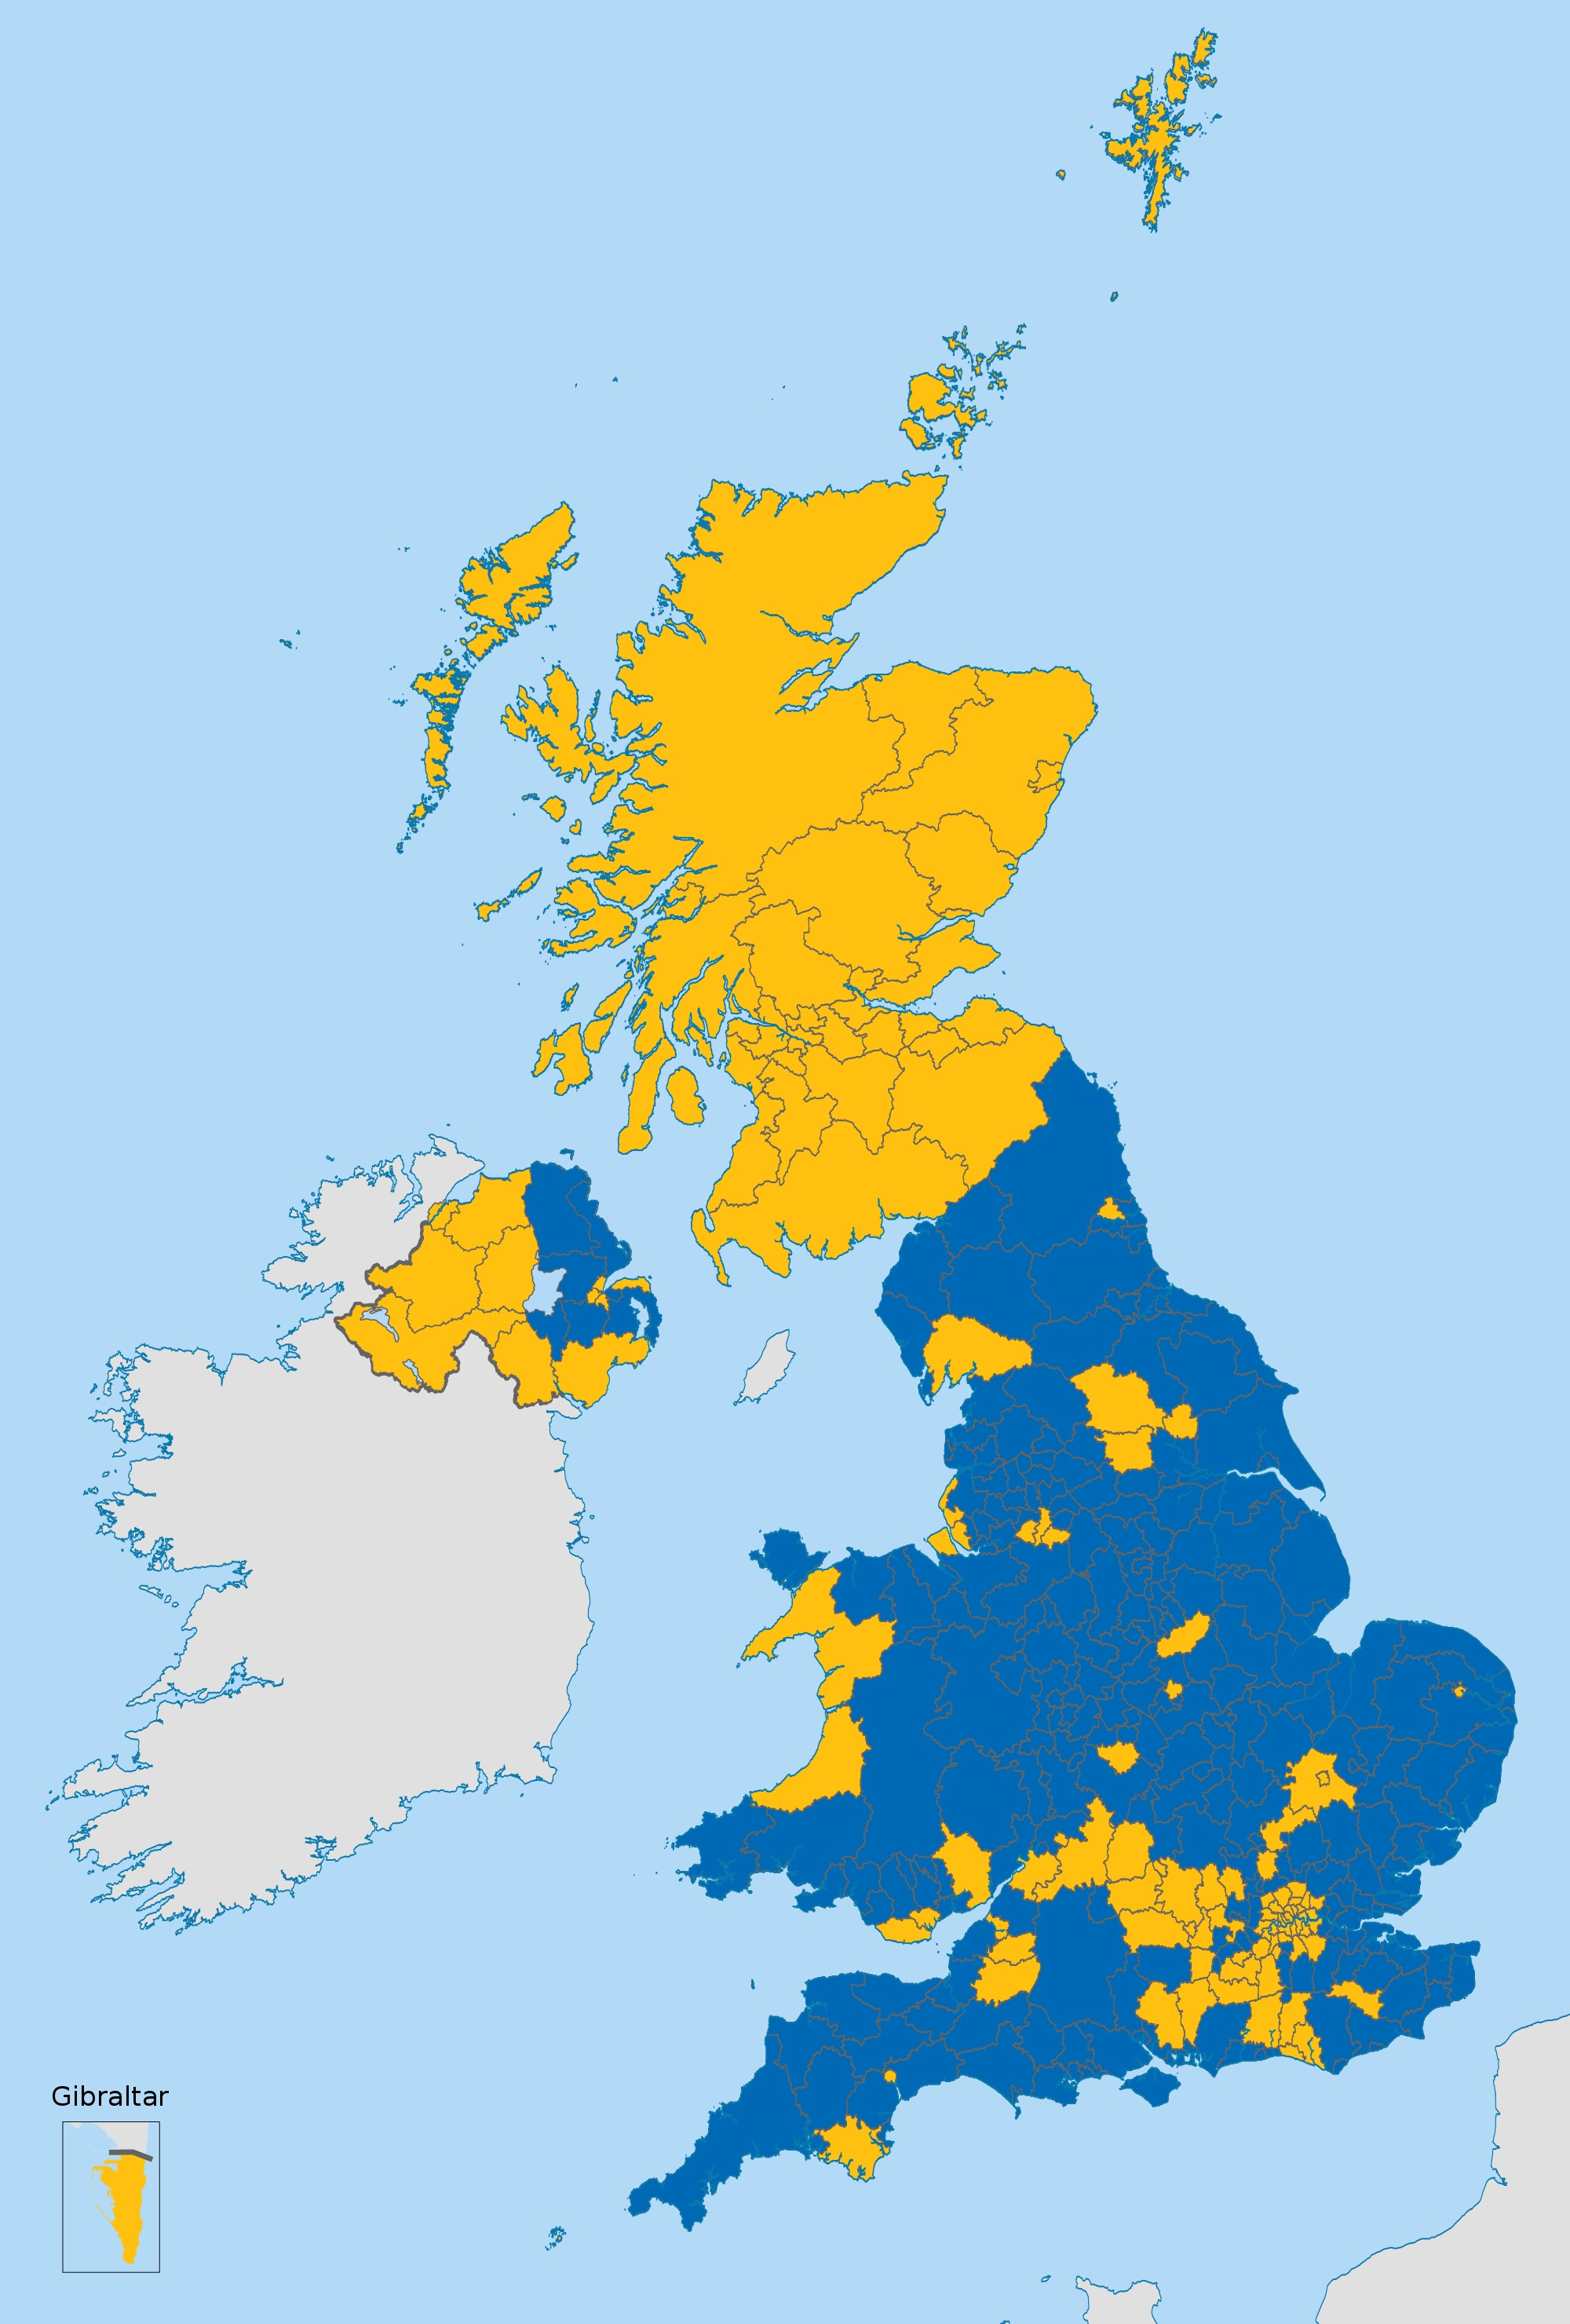
Figure 1: EU referendum vote by electoral ward. Yellow indicates Remain, blue indicates Leave

In the next few days, the Guardian newspaper presented some apparent demographic trends in the vote, based
on the ages, incomes, education and class of different electoral wards 
(https://www.theguardian.com/politics/ng-interactive/2016/jun/23/eu-referendum-live-results-and-analysis). The Guardian’s analysis stopped at
showing these results graphically, and commenting on the apparent patterns. We will go one better by doing
some real statistical analysis of the data.

I have scraped the data from the Guardian’s plots into a data file (brexit.csv) which you can download from
MINERVA

There are 6 attributes in the data. The 5 possible input variables are:

* abc1: proportion of individuals who are in the ABC1 social classes (middle to upper class)
* medianIncome: the median income of all residents
* medianAge: median age of residents
* withHigherEd: proportion of residents with any university-level education
* notBornUK: the proportion of residents who were born outside the UK

These are normalised so that the lowest value is zero and the highest value is one.
The output variable is called voteBrexit, and gives a TRUE/FALSE answer to the question ‘did this electoral
ward vote for Brexit?’ (i.e. did more than 50% of people vote to Leave?).

Tasks (week 6):

1. Fit a logistic regression models using all of the available inputs. Identify the direction of each effect
from the fitted coefficients. Compare these with the plots shown on the Guardian website. Do they
agree? Explain. (1 mark)
2. Present the value of each coefficient estimate and calculate the 95% confidence interval. Which input would you
say has the strongest effect and why? (0.5 mark) 
3. Using aic, perform a model selection to determine which factors are useful to predict the result of
the vote. You can use a ‘greedy’ input selection procedure, as follows: (i) select the best model with 1 input;
(ii) fixing that input, select the best two-input model (i.e. try all the other 4 inputs with the one you
selected first); (iii) select the best three-input model containing the first two inputs you chose, etc. At
each stage evaluate the quality of fit using aic and stop if this gets worse. (1 marks)
4. Perform cross-validation to directly test how well each model predicts new data. Remember to repeat the data splitting many times to check your results. Compare these to the values you get from AIC. (1 mark)

Tasks (week 7):

5. Use the Scikit-Learn package to create a decision tree classification model. Visualise your model and intepret
the fitted model. (0.5 mark)
6. Using the ideas of cross-validation for decision tree's, can you improve your predictions ? (1 mark)
7. Compare your decision tree model and your logistic regression model. Do they attribute high importance
to the same factors? How do you intepret each model to explain the referendum vote? (1 mark)
8. Which model would you use if you were explaining the results for a newspaper article, and why? (0.5 mark)
9. Quality of presentation of report in Jupyter notebook (2 mark)
10. Bonus point: Justify why your work/report goes beyond just completing the tasks and deserves an extra mark (1 mark) 

**Submission of work:** 
-	The work must be submitted as an ipynb on minerva
-	The filename must be Surname-problem6and7.ipynb
-	The self-assessment must be added at the end of the ipynb. Mark each task above.
-	Declaration of integrity (That the work you submitted is yours, and that you marked it fairly)

**Deadline:** 19th March 2024, 5pm

In [1]:
import numpy as npy # importing required modules
import pandas as pds
import matplotlib.pyplot as plt
from statsmodels.formula.api import glm
import statsmodels.api as sm

**Task 1**

In [2]:
data = pds.read_csv('brexit.csv') # importing file
#abc1, notBornUK, medianIncome, medianAge, withHigherEd, voteBrexit


abc1 = data.iloc[:,0]
notBornUK = data.iloc[:,1]
medianIncome = data.iloc[:,2] # setting each column as a list (to produce seperate df's for clarity of analysis)
medianAge = data.iloc[:,3]
withHigherEd = data.iloc[:,4]
voteBrexit = data.iloc[:,5]

df = pds.DataFrame({'Y': voteBrexit, 'X1': abc1, 'X2': notBornUK, 'X3': medianIncome, 'X4': medianAge, 
                    'X5': withHigherEd}) # creating new data frame with simplified variable names

df['Y'] = df['Y'].astype(int) # converting the leave/ remain votes into binary

column_names = df.columns.tolist() # getting a list of the column names
formulas = [] # initiating a list to store the formulas

for i in range(len(column_names)-1): #loop to create formula for each variable e.g. Y ~ X1
    formulas.append('Y ~ ' + str(column_names[i+1]))

betas = [] # initialising list to store beta values from glm calculation
cis = [] # intialising list to store confidence interval values for each beta1

standard_error = [] # intialising list to store standard error values for each beta1

for i in range(len(formulas)): # loop to do glm calculation and store beta1 and ci's
    lin_reg = glm(formulas[i], df, family = sm.families.Binomial()).fit()
    cis.append(lin_reg.conf_int().loc[column_names[i+1]]) # a matrix of the confidence intervals of the betas
    betas.append(lin_reg.params[1])
    
    # standard_error.append(lin_reg.bse[1]) # how I would get se to calculate confidence intervals if required

betas_form = [] # initialising list to store formatted beta1 values

for i in betas: # loop to format beta values
    betas_form.append(format(i, '.3g')) # formating the betas from the analytic method and adding to new list

print('abc1 beta: ' + str(betas_form[0])) # printing betas for each variable
print('notBornUK beta: ' + str(betas_form[1]))
print('medianIncome beta: ' + str(betas_form[2]))
print('medianAge beta: ' + str(betas_form[3]))
print('withHigherEd beta: ' + str(betas_form[4]))

abc1 beta: -4.86
notBornUK beta: -4.83
medianIncome beta: -6.25
medianAge beta: 3.1
withHigherEd beta: -8.84


This shows that for all variables except increasing median age caused a increase in likelihood to vote remain as the variable increased. This agrees with the graphs presented on the Guardians website. The strength of each plot on the website also agrees with the beta values I obtained as weaker graphs like median age have a lower beta and stronger ones such as education have a higher value.

**Task 2**

In [3]:
#import scipy.stats
#zc = scipy.stats.norm.ppf(0.975)
#CI_min = []
#CI_max = []
#for i in range(len(standard_error)):
#    CI_min.append(betas[i] - zc*standard_error[i])
#    CI_max.append(betas[i] + zc*standard_error[i])
# CALCULATION FOR CONFIDENCE INTERVALS, BUT IS NOT NEEDED AS CAN JUST OBTAIN FROM GLM

In [4]:
lower_bounds = [] # initialising lists to store the formatted lower and upper bounds of ci's
upper_bounds = []

for i in range(len(cis)): # loop to format the lower and upper bounds of ci's
    lower_bounds.append(format(cis[i][0], '.2e')) # formatting and adding lower bounds of confidence intervals to list
    upper_bounds.append(format(cis[i][1], '.2e')) # formatting and adding upper bounds of confidence intervals to list
table_rows = [] # initialising list to store table data

for i in range(len(betas_form)): # loop to append data to table.
    # creating a row for table
    row = {
        'glm': betas_form[i],
        '[0.025': lower_bounds[i],
        '0.975]': upper_bounds[i]
    }

    table_rows.append(row) # storing rows
    
table_vals = pds.DataFrame(table_rows) # creating table

column_names.remove('Y') # removing Y from list
table_vals.index = column_names # setting index to variables
print('''\033[4mThe beta value for each variable and 
its associated confidence interval.\033[0m''')
print(table_vals.to_markdown()) # showing table
# 'X1': abc1, 'X2': notBornUK, 'X3': medianIncome, 'X4': medianAge, 'X5': withHigherEd

The beta value for each variable and 
its associated confidence interval.
|    |   glm |   [0.025 |   0.975] |
|:---|------:|---------:|---------:|
| X1 | -4.86 |    -6.3  |    -3.43 |
| X2 | -4.83 |    -6.39 |    -3.27 |
| X3 | -6.25 |    -8.02 |    -4.47 |
| X4 |  3.1  |     1.93 |     4.28 |
| X5 | -8.84 |   -10.9  |    -6.75 |


From the confidence intervals it can be shown that all variables are significant as none of them pass throuh zero, the percentage of the population with higher education (X5) is the strongest as it has the highest value.

**Task 3**

In [5]:
# 'X1': abc1, 'X2': notBornUK, 'X3': medianIncome, 'X4': medianAge, 'X5': withHigherEd})
col_names = df.columns.tolist() # list of column names 
best = 'Y ~ ' # starting best equation variable
formula_greedy = [] # initialising the list to store the 

for j in range(len(col_names)-1):
    formula_greedy.append(best + str(col_names[j+1]))

aic_list = [] 
for i in formula_greedy:
    model = glm(i, df, family = sm.families.Binomial()).fit() # for each formula running the glm fit
    aic_list.append(model.aic) # calculating the aic and adding it to list
min_formula = aic_list.index(min(aic_list)) # finding the minimum of the list
best = formula_greedy[min_formula] # printing the formula that corresponds to the minimum of the list
col_names.pop(min_formula + 1)

for k in range(len(col_names)-1):
    while npy.argmin(aic_list) != 0:
        formula_greedy = [best]
        
        for j in range(len(col_names)-1):
            formula_greedy.append(best + ' + ' + str(col_names[j+1]))
        
        aic_list = [] 
        for i in formula_greedy:
            model = glm(i, df, family = sm.families.Binomial()).fit() # for each formula running the glm fit
            aic_list.append(model.aic) # calculating the aic and adding it to list
        
        min_formula = npy.argmin(aic_list) # finding the minimum of the list
        best = formula_greedy[min_formula] # printing the formula that corresponds to the minimum of the list 
        col_names.pop(min_formula)
print('The most accurate equation for the data is: ' + str(best))

The most accurate equation for the data is: Y ~ X5 + X1 + X4 + X3 + X2


This result shows that at each stage of the greedy process, incorporating another equation into the equation leads to a more accurate fit. Although the order in which the variables are added are similar to the magnitude of the beta values from the previous task, they are not in the same order (expected = X5, X3, X1, X2, X4), this suggests there is a correlation between variables.

**Task 4**

In [6]:
import itertools

# Define the variables
variables = ['X1', 'X2', 'X3', 'X4', 'X5']

# Initialize an empty list to store the equations
equations = []

# Generate all combinations of variables
for r in range(1, len(variables) + 1):
    for combination in itertools.combinations(variables, r):
        # Join the variables with '+' to form an equation
        equation = ' + '.join(combination)
        final_equations = 'Y ~ ' + str(equation)
        # Add the equation to the list
        equations.append(final_equations)

In [7]:
from sklearn.model_selection import train_test_split
from scipy.stats import norm

winner = [] # creating a list to record the best formula for each repeat
repeats = 100 # number of repeats to carry out the log likelihood calculation
for j in range(repeats):
    # splitting the data equally into training and test data
    train_data, test_data = train_test_split(df, test_size=0.5) 

    predictive_log_likelihood = [] # initialising a list to store the LL values for each formula


    for i in equations:
         # calculating the linear fit for each formula using training data
        current_model = glm(i, train_data, family = sm.families.Binomial()).fit()
        sigma = npy.sqrt(current_model.scale) # finding the standard deviation of the model  
        ypredict_mean = current_model.predict(test_data) # Get the predicted mean for each new data point
        ypredict_meandf=pds.DataFrame({'ypredict_mean': ypredict_mean}) # Putting the mean values into a dataframe

        # calculating the predictive log probability by summing the log probability of each output value in the 
        # test data
        predictive_log_likelihood.append(npy.sum(norm.logpdf(test_data[['Y']],
                                                             loc = ypredict_meandf[['ypredict_mean']], scale = sigma )))
    
    winner.append(npy.argmax(predictive_log_likelihood)) # finding the largest LL and appending it to the best list

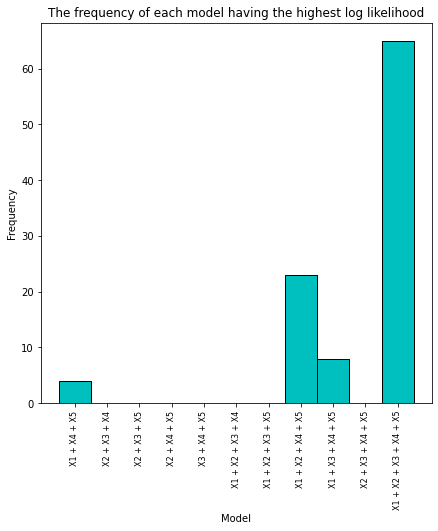

In [8]:
# Assuming 'winner' and 'equations' are defined
unique_numbers = list(set(winner))
ModelNumber = npy.arange(min(winner), max(winner)+2, 1) # Include max(winner)

plt.figure(figsize=(7, 7))
plt.hist(winner, bins = ModelNumber, edgecolor='black', color = 'c', align='left') # Align bins to the left

plt.xlabel("Model") # labelling axes
plt.ylabel("Frequency")
plt.title('The frequency of each model having the highest log likelihood')  # title

labels = [equations[i].replace('Y ~ ', '') for i in range(min(winner), max(winner)+1)] # Adjust indices here
plt.xticks(npy.arange(min(winner), max(winner)+1, 1), labels, rotation = 90, fontsize = 8) # Include max(winner) and align labels

plt.show()


In [9]:
print('The most accuract equation using cross-validation is: ' + str(equations[max(winner)]))

The most accuract equation using cross-validation is: Y ~ X1 + X2 + X3 + X4 + X5


The graph is simplfied to exclude some of the equations which had no 'wins' so the data is more clear, however all interations were ran. Overall the cross-validation was shown on average to signficantly agree that using all the variables is the most accurate. This result however may be due to overfitting as it may be incorporating noise into the model as some variables do show weaker correlations than others, however I do not believe it is appropriate to crop nosie out as they are valid data points as their confidence intervals do not pass through zero.

**Task 5**

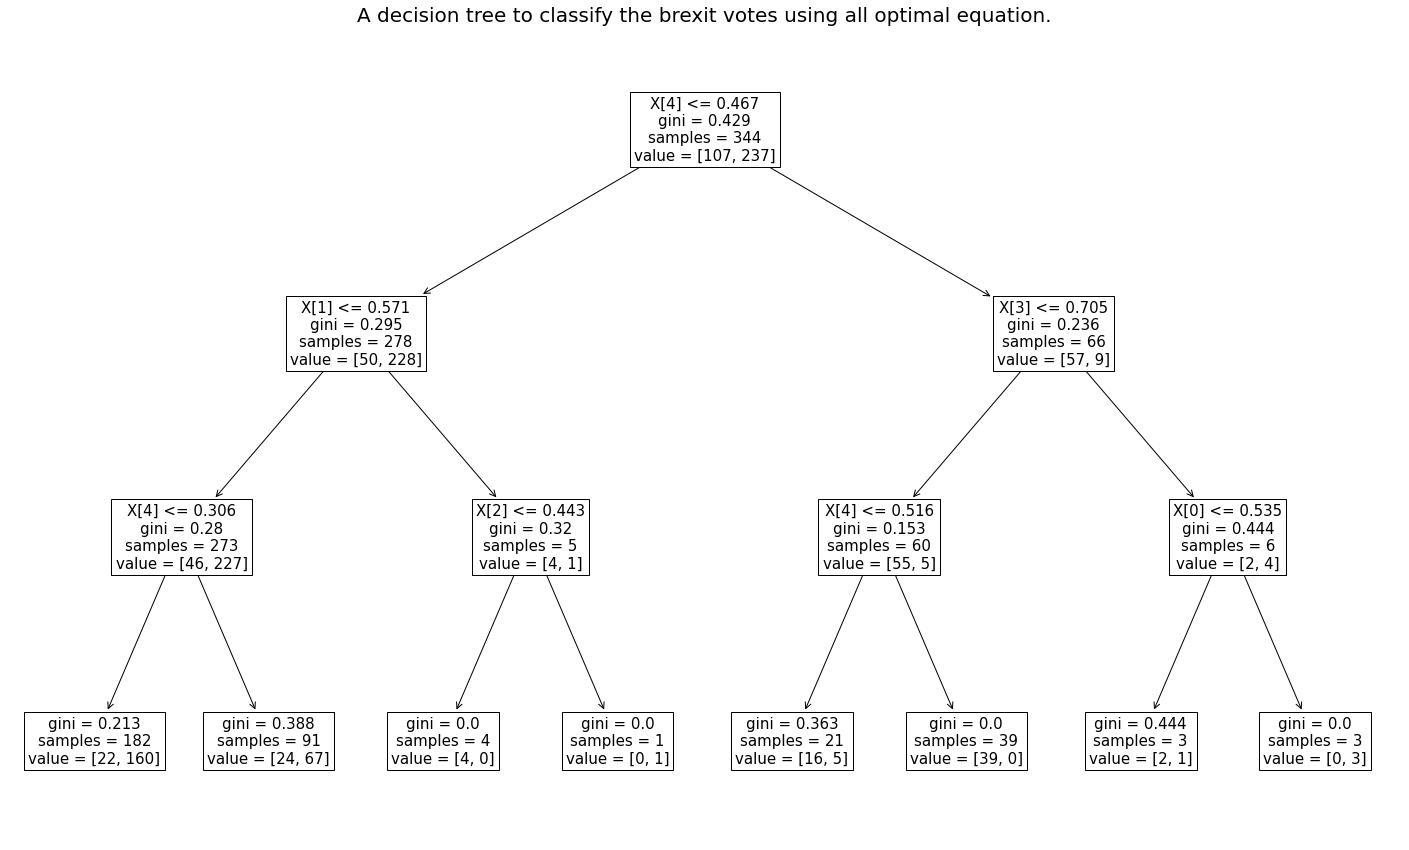

Variable importance values:
X1 = 0.021
X2 = 0.061
X3 = 0.025
X4 = 0.058
X5 = 0.84


In [10]:
from sklearn.tree import DecisionTreeClassifier # importing relevant modules
from sklearn.metrics import accuracy_score
from sklearn import tree

XP = df[['X1', 'X2', 'X3', 'X4', 'X5']] # defining the variables
YP = df['Y']
mytree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3) # assigning the classification parameters to be used
mytree.fit(XP,YP) # fitting the classification to the data
plt.figure(figsize=(25,15))  # adjusting figure size
tree.plot_tree(mytree, fontsize = 15) # plotting tree 
plt.title('A decision tree to classify the brexit votes using all optimal equation.', fontsize = 20)
plt.show()
column_names = df.columns.tolist() 
column_names.remove('Y')
print('Variable importance values:')
for i in range(len(mytree.feature_importances_)):
    print(str(column_names[i]) + ' = ' + str(format(mytree.feature_importances_[i],'.2g')))
# 'X1': abc1, 'X2': notBornUK, 'X3': medianIncome, 'X4': medianAge, 'X5': withHigherEd

A max depth of 3 branches was chosen as this is the point where many of the subsets begin to reach gini values of zero, therefore allowing the model to go any further would cause it be overcomplicated and possibly overfit. The variable importances show that the variables go in order of X5, X2, X4, X1, X3.

**Task 6**

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV # importing relevant modules
from sklearn.metrics import precision_recall_fscore_support

reps = 100 # number of repeats of cross validation
# initialsing lists to store the values for various test params
accuracytest = []
recall = []

for i in range(reps): # cross validation loop
    # splitting data into test and train equally
    XP_train, XP_test, YP_train, YP_test = train_test_split(df[['X1', 'X2', 'X3', 'X4', 'X5']], df['Y'],
                                                                                                    test_size = 0.5)
    mytree = DecisionTreeClassifier(criterion = 'gini')
    mytree.fit(XP_train, YP_train)
    YP_test_pred = mytree.predict(XP_test)# predicting data

# Calculate the accuracy of the train and test predictions
    prfs = precision_recall_fscore_support(YP_test, YP_test_pred) # getting parameters for how well the fit did
    recall.append(prfs[1])  # appending recall to its list
    accuracytest.append(accuracy_score(YP_test, YP_test_pred))


print('Average accuracy: '+ str(npy.mean(accuracytest)))
print('Average recall for remain: ' + str(npy.mean([r[0] for r in recall])))
print('Average recall for leave: ' + str(npy.mean([r[1] for r in recall])))

Average accuracy: 0.7580813953488371
Average recall for remain: 0.6269015466366643
Average recall for leave: 0.8192113781537578


This is the initial cross validation, which no optimisation. For recall, which is the proportion of actual positives identified,  the value for remain group is much lower than for leave group showing that there is an imbalance in the data because there is much less data to train to predict a remain vote compared to the leave vote. To improve this the data should be stratified to make the training for each outcome even, to further improve the data, a larger proportion of the data should be used to train the data compared to testing it. As well as these changes the criterion will be optimised using cross-validation.

In [12]:
param_grid = {'max_depth': list(range(1, 5)),
              'min_samples_split': list(range(2, 5)),
              'min_samples_leaf': list(range(1, 5))} # parameters being investigated

mytree = DecisionTreeClassifier(criterion = 'gini') # creating classifier
grid = GridSearchCV(mytree, param_grid, cv=10, scoring='accuracy') # cross-validation grid search function
grid.fit(df[['X1', 'X2', 'X3', 'X4', 'X5']], df['Y']) # fitting data

print('Optimal max_depth:', grid.best_estimator_.get_params()['max_depth']) # veiwing best parameters
print('Optimal min_samples_split:', grid.best_estimator_.get_params()['min_samples_split'])
print('Optimal min_samples_leaf:', grid.best_estimator_.get_params()['min_samples_leaf'])

Optimal max_depth: 1
Optimal min_samples_split: 2
Optimal min_samples_leaf: 1


In [13]:
# incorporaing all the changes
reps = 100 # number of repeats of cross validation
# initialsing lists to store the values for various test params
accuracytest2 = []

for i in range(reps): # cross validation loop - same as before with parameter changes
    XP_train, XP_test, YP_train, YP_test = train_test_split(df[['X1', 'X2', 'X3', 'X4', 'X5']], df['Y'],
                                                                            test_size = 0.2, stratify = df['Y'])
    mytree = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, min_samples_leaf = 1, min_samples_split = 2 )
    mytree.fit(XP_train, YP_train)
    YP_test_pred = mytree.predict(XP_test)

    prfs = precision_recall_fscore_support(YP_test, YP_test_pred) # getting parameters for how well the fit did
    accuracytest2.append(accuracy_score(YP_test, YP_test_pred))
print('Initial test accuracy: '+ str(npy.mean(accuracytest)))
print('Optimised test accuracy: '+ str(npy.mean(accuracytest2)))

Initial test accuracy: 0.7580813953488371
Optimised test accuracy: 0.8289855072463769


This results in a very large increase in accuracy, on average 6%.

**Task 7**

For the linear regression model the variables importance go in the order (highest to least): withHigherEd, medianIncome, abc1, notBornUK, medianAge. However for teh decision tree model the order is: withHigherEd, notBornUK, medianAge, medianIncome, abc1. These seem very different, however they both agree that percentage of the population with higher education is by far the most important factor when determining the outcome of the referendum (increasing percentage in higher education, increases the chance of a remain vote) and the rest of the variables whilst still somewhat important are much less so than that. For the decision tree they have a very small effect but the regression model atrributes more importance on them. 

Whilst this data can be assumed to be largely accurate, it does not necessarily infer causality for the variables as the actual people who voted in each area cannot be determined, and this data will be based off total consitituency averages. This means that for example if less people in abc1 voted compared to the rest of the classes compared to the average in that consitituency then the tehre will be a bias.

**Task 8**

I would choose the decision tree model as most of the public know the basics of a decision tree and whilst they can create complex trends, it is also simple to explain the first few branches and from a hierarchical structure for easy intrepretation and visualisation, as well as this it is better suited to binomial problems such as the brexit vote as it is a classification model.

Given this a regression model is helpful to see the variance in the trends as well as the general direction of variables. 

**Self reflection**

**Task 1** - A linear regression model for each variable was fit and the data was shown to agree with the Guardians graphs, down to the strength as well as direction of effect. **(1/1 mark)**

**Task 2** - The confidence intervals and beta values for each variable were presented effectively in a table and the percentage of the population was evaluated to be the most important variable. 2 methods to obtain the confidence intervals were given. **(0.5/0.5 mark)**

**Task 3** - Greedy selection was successfully used to create the best fitting equation according to AIC and the order of the variables in the equation was discussed. **(1/1 mark)**

**Task 4** - Cross-validation was used to test every combination of variable possible and resulted in the same outcome as for the greedy AIC method. The (useful) data was presented in a graph in a visually appealing manner. **(1/1 mark)**

**Task 5** - A decision tree was plotted, limiting max depth so the data was easy to interpret. The order of importance of variables was given. **(0.5/0.5 mark)**

**Task 6** - A variety of different parameters we tested for both the decision tree classifiers as well as trying to adjust for the poor data set. This accumulated in an increase in precision of over 5%. 
 **(1/1 mark)**

**Task 7** - A comparison for the order of how each method assigns the most important variable was carried out and how they suggest the referendum is decided was commented on. As well as this an insight into the potential to blindly accept the data may not be the best idea.
**(1/1 mark)**

**Task 8** - Reasons were listed for why I would use a decision tree to present the data, and a few reasons for the contrary were also given.
**(0.5/0.5 mark)**

**Quality of presentation** - The code was labelled well and most figures and graphs were presented in a visually appealing manner with titles and axes labels. Most of the code was in a concise manner and in discrete intuitive sections.
**(1.5/2 marks)**

**Bonus point** - A variety of parameters were test in task 6 which involved an understanding of how the data itself can affect predictions and a good understanding of the data and issues was shown.
**(0.5/1 mark)**

## Total: 8.5/10 marks